In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('data/cansim-0800020-eng-6674700030567901031.csv',
                skiprows=6, skipfooter=9,
                engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [4]:
from pandas.tseries.offsets import MonthEnd

In [5]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')

In [7]:
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


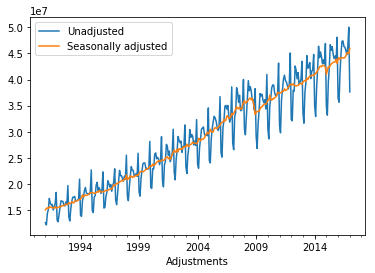

In [8]:
df.plot()

In [9]:
split_date = pd.Timestamp('01-01-2011')

In [10]:
split_date

Timestamp('2011-01-01 00:00:00')

In [13]:
train = df.loc[:split_date, ['Unadjusted']]
test = df.loc[split_date:, ['Unadjusted']]

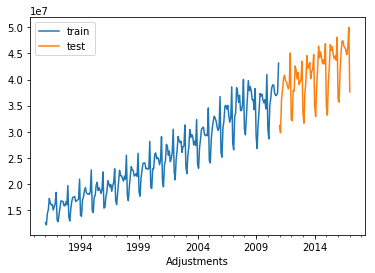

In [14]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [17]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [19]:
train_sc.shape

(240, 1)

In [20]:
test_sc.shape

(73, 1)

In [21]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [22]:
X_train.shape

(239, 1)

In [30]:
from keras.models import Sequential
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [34]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [37]:
early_stop = EarlyStopping(monitor='loss', patience=30, verbose=1)

In [38]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

Epoch 1/200
239/239 [==============================] - 0s 899us/step - loss: 0.0103
Epoch 2/200
239/239 [==============================] - 0s 859us/step - loss: 0.0102
Epoch 3/200
239/239 [==============================] - 0s 856us/step - loss: 0.0100
Epoch 4/200
239/239 [==============================] - 0s 910us/step - loss: 0.0103
Epoch 5/200
239/239 [==============================] - 0s 893us/step - loss: 0.0100
Epoch 6/200
239/239 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 7/200
239/239 [==============================] - 0s 918us/step - loss: 0.0101
Epoch 8/200
239/239 [==============================] - 0s 884us/step - loss: 0.0099
Epoch 9/200
239/239 [==============================] - 0s 897us/step - loss: 0.0101
Epoch 10/200
239/239 [==============================] - 0s 873us/step - loss: 0.0100
Epoch 11/200
239/239 [==============================] - 0s 889us/step - loss: 0.0101
Epoch 12/200
239/239 [==============================] - 0s 871us/step - loss

In [39]:
y_pred = model.predict(X_test)

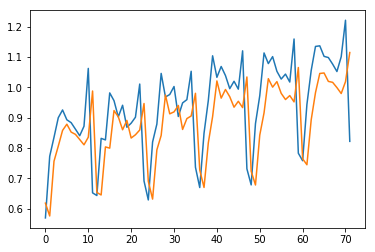

In [40]:
plt.plot(y_test)
plt.plot(y_pred)

<h1>Recurrent Predictor</h1>

In [41]:
from keras.layers import LSTM

In [42]:
X_train.shape

(239, 1)

In [43]:
X_train[:, None].shape

(239, 1, 1)

In [44]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [45]:
K.clear_session()

model = Sequential() 
model.add(LSTM(6, input_shape=(1, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
model.fit(X_train_t, y_train, 
         epochs=100, batch_size=1, verbose=1,
         callbacks=[early_stop])

Epoch 1/100
239/239 [==============================] - 1s 5ms/step - loss: 0.1415
Epoch 2/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0436
Epoch 3/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0342
Epoch 4/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0276
Epoch 5/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0224
Epoch 6/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0176
Epoch 7/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0146
Epoch 8/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0124
Epoch 9/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0112
Epoch 10/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0109
Epoch 11/100
239/239 [==============================] - 1s 3ms/step - loss: 0.0105
Epoch 12/100
239/239 [==============================] - 1s 4ms/step - loss: 0.0104
Epoch 13/100


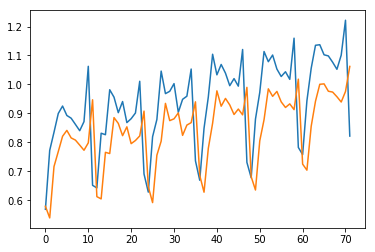

In [48]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

<h1>Windows</h1>

In [50]:
train_sc.shape

(240, 1)

In [51]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [52]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [55]:
train_sc_df

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,,
1991-01-31,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-02-28,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-04-30,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-05-31,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-06-30,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-07-31,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN,NaN
1991-08-31,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN,NaN
1991-09-30,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020,NaN,NaN,NaN,NaN


In [56]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [57]:
X_train

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628
1992-06-30,0.149130,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141
1992-07-31,0.147189,0.149130,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958
1992-08-31,0.144648,0.147189,0.149130,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174
1992-09-30,0.118984,0.144648,0.147189,0.149130,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309


In [58]:
X_train = X_train.values
X_test = X_test.values 

y_train = y_train.values
y_test = y_test.values

In [59]:
K.clear_session()

model = Sequential() 
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 2/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 3/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 4/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 5/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 7/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 8/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 9/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 10/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 11/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 12/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 13/200


228/228 [==============================] - 0s 2ms/step - loss: 9.6104e-04
Epoch 99/200
228/228 [==============================] - 0s 2ms/step - loss: 7.8943e-04
Epoch 100/200
228/228 [==============================] - 0s 2ms/step - loss: 9.8896e-04
Epoch 101/200
228/228 [==============================] - 0s 2ms/step - loss: 9.9231e-04
Epoch 102/200
228/228 [==============================] - 0s 2ms/step - loss: 9.2740e-04
Epoch 103/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 104/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 105/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 106/200
228/228 [==============================] - 0s 2ms/step - loss: 9.0353e-04
Epoch 107/200
228/228 [==============================] - 0s 2ms/step - loss: 8.0777e-04
Epoch 108/200
228/228 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 109/200
228/228 [==============================] - 0s 2ms

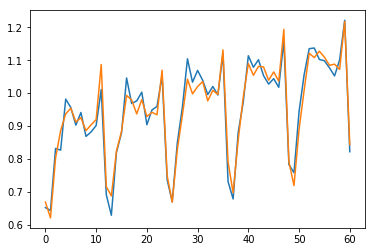

In [62]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

<h1>LSTM on Windows</h1>

In [63]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12)

In [64]:
X_train_t.shape

(228, 1, 12)

In [65]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 12)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [66]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
228/228 [==============================] - 1s 5ms/step - loss: 0.0399
Epoch 2/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 3/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0085
Epoch 4/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0078
Epoch 5/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0073
Epoch 6/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0069
Epoch 7/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 8/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0063
Epoch 9/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0057
Epoch 10/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 11/100
228/228 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 12/100
228/228 [==============================] - 1s 4ms/step - loss: 0.0045
Epoch 13/100


228/228 [==============================] - 1s 3ms/step - loss: 9.9585e-04
Epoch 99/100
228/228 [==============================] - 1s 3ms/step - loss: 9.6491e-04
Epoch 100/100
228/228 [==============================] - 1s 3ms/step - loss: 9.2388e-04


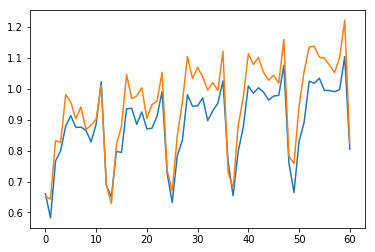

In [68]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)